In [1]:
import pandas as pd # standard
import numpy as np # standard
from sklearn import tree # package to make decision tree
from sklearn.metrics import accuracy_score # for accuracy calculation
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

import thermogram_utilities

import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel("/Users/avery/OneDrive/Documents/GitHub/Clinical_TLB_2023-2024/lung_cancer_tlb.xlsx")

# replace NA with control
df['CancerType'] = np.where(df['CancerType'].isna(), 'Control', df['CancerType'])

# get location of cut off values
lower_column_index = df.columns.get_loc("T50")
upper_column_index = df.columns.get_loc("T85.1")
label_column_index = df.columns.get_loc("CancerType")

column_indices = np.arange(lower_column_index, upper_column_index)
column_indices = np.append(column_indices, 0)
column_indices = np.append(column_indices, 1)



column_indices = np.append(column_indices, label_column_index)

df = df.iloc[:, column_indices]

# keep only Control and Adenocarcinoma for analysis
df_tree = df[(df['CancerType'] == 'Control') | (df['CancerType'] == 'Adenocarcinoma')]
df_tree = df_tree.reset_index(drop=True)

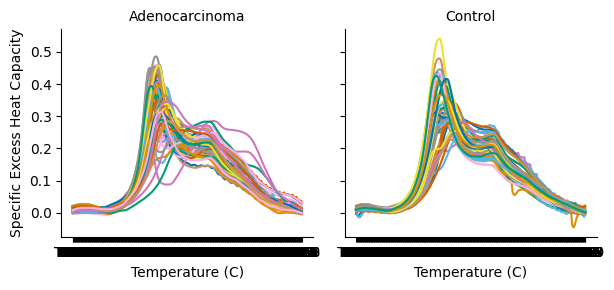

In [2]:
df_long = pd.melt(df_tree, id_vars=['sample_id', 'pub_id', 'CancerType'], var_name='temp', value_name='dsp' )
df_long['temperature'] = df_long['temp'].str.replace('T', '').astype(float)


g = sns.FacetGrid(df_long, col="CancerType", col_wrap= 3, hue="sample_id", palette = 'colorblind')
g.map_dataframe(sns.lineplot, x="temp", y="dsp")
g.set_axis_labels("Temperature (C)", "Specific Excess Heat Capacity")
g.set_titles(col_template="{col_name}")

Text(0.5, 1.0, 'Median Lung Cancer Thermograms')

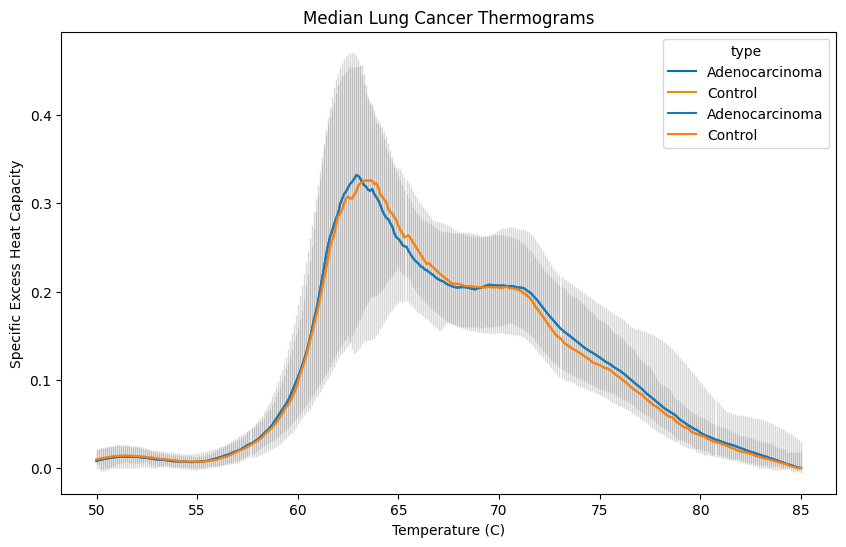

In [3]:
df_long = pd.melt(df_tree, id_vars=['sample_id', 'pub_id', 'CancerType'], var_name='temp', value_name='dsp' )

median_df = thermogram_utilities.median_curve(df_long, 'CancerType', 'temp', 'dsp')

median_df['temperature'] = median_df['temperature'].str.replace('T', '').astype(float)

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.lineplot(data=median_df, x='temperature', y='median', hue='type', palette='colorblind')
ax = plt.gca()

# Plot the lines with different colors for 'type'
sns.lineplot(data=median_df, x='temperature', y='median', hue='type')

# Add ribbons for each 'type' with different colors
for _, row in median_df.iterrows():
    ax.fill_between([row['temperature']], row['lower_q'], row['upper_q'], alpha=0.3, color='grey')

plt.xlabel('Temperature (C)')
plt.ylabel('Specific Excess Heat Capacity')
plt.title('Median Lung Cancer Thermograms')

In [9]:
df_tree_dif1 = df_tree.select_dtypes(include=['number']).diff(axis = 1)
non_numeric_columns = df_tree.select_dtypes(exclude=['number'])
df_tree_dif1 = pd.concat( [df_tree_dif1, non_numeric_columns], axis=1)
df_tree_dif1 = df_tree_dif1.iloc[:, 1:]

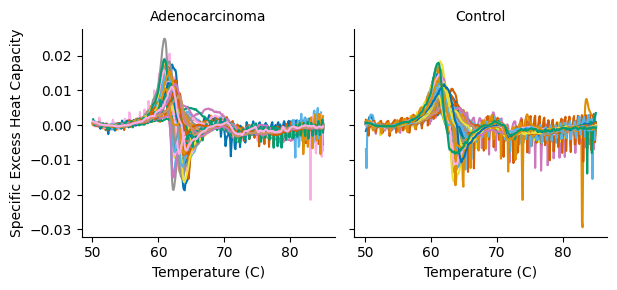

In [10]:
df_long = pd.melt(df_tree_dif1, id_vars=['sample_id', 'pub_id', 'CancerType'], var_name='temp', value_name='dsp' )
df_long['temp'] = df_long['temp'].str.replace('T', '').astype(float)


g = sns.FacetGrid(df_long, col="CancerType", col_wrap= 3, hue="sample_id", palette = 'colorblind')
g.map_dataframe(sns.lineplot, x="temp", y="dsp")
g.set_axis_labels("Temperature (C)", "Specific Excess Heat Capacity")
g.set_titles(col_template="{col_name}")

In [12]:
df_tree_dif1 = df_tree.select_dtypes(include=['number']).diff(axis = 1)
df_tree_dif2 = df_tree_dif1.diff(axis = 1)
non_numeric_columns = df_tree.select_dtypes(exclude=['number'])
df_tree_dif2 = pd.concat( [df_tree_dif2, non_numeric_columns], axis=1)
df_tree_dif2 = df_tree_dif2.iloc[:, 2:]

#df_tree_dif2

,T50.2,T50.3,T50.4,T50.5,T50.6,T50.7,T50.8,T50.9,T51,T51.1,...,T84.4,T84.5,T84.6,T84.7,T84.8,T84.9,T85,sample_id,pub_id,CancerType
0,-2.200000e-04,-0.00002,0.00025,0.00032,-0.00035,-0.00017,-0.00031,0.00012,-1.400000e-04,-0.00032,...,0.000080,2.100000e-04,-6.100000e-05,0.000269,0.000072,6.280000e-04,0.000193,C67801,L14,Adenocarcinoma
1,-1.400000e-04,0.00023,0.00005,-0.00052,0.00034,-0.00021,-0.00002,-0.00020,1.400000e-04,-0.00020,...,-0.000070,6.000000e-05,1.300000e-04,0.000220,0.000259,6.000000e-05,0.000573,C67901,L15,Adenocarcinoma
2,-2.600000e-04,0.00006,-0.00021,0.00003,0.00006,-0.00019,0.00007,-0.00040,-8.000000e-05,-0.00014,...,-0.000062,1.090000e-04,-4.220000e-04,0.000920,0.000580,-4.336809e-19,0.000050,C55701,L4,Adenocarcinoma
3,1.700000e-04,0.00028,-0.00038,-0.00007,-0.00017,-0.00047,0.00024,-0.00018,1.100000e-04,0.00019,...,-0.000740,3.800000e-04,-2.600000e-04,0.000180,0.000480,-3.000000e-04,0.000460,C67201,L13,Adenocarcinoma
4,-1.000000e-04,-0.00061,-0.00040,0.00054,0.00023,-0.00039,0.00016,-0.00026,-4.100000e-04,0.00010,...,-0.000670,-5.400000e-04,1.381000e-03,0.001220,0.000022,2.713000e-04,0.000096,L15701,L83,Adenocarcinoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,1.600000e-04,-0.00016,-0.00021,-0.00001,-0.00017,-0.00009,-0.00006,-0.00006,-4.000000e-05,-0.00009,...,0.000140,4.336809e-19,1.700000e-04,0.000050,0.000330,1.550000e-04,0.000556,44,C39,Control
119,1.000000e-05,0.00010,0.00001,-0.00003,-0.00007,-0.00002,-0.00006,-0.00001,-6.000000e-05,-0.00008,...,0.000080,7.000000e-05,5.000000e-05,0.000200,0.000089,1.050000e-04,0.000501,45,C40,Control
120,-1.000000e-05,0.00002,-0.00010,-0.00010,-0.00006,-0.00003,0.00002,-0.00008,-1.000000e-04,-0.00009,...,0.000150,1.500000e-04,1.700000e-04,0.000000,-0.000150,-5.000000e-05,0.000090,46,C41,Control
121,2.900000e-04,-0.00045,-0.00034,-0.00020,-0.00008,-0.00011,-0.00001,-0.00011,-1.734723e-18,0.00006,...,-0.000080,-1.300000e-04,-8.673617e-19,0.000190,0.000080,5.000000e-05,0.000150,47,C42,Control


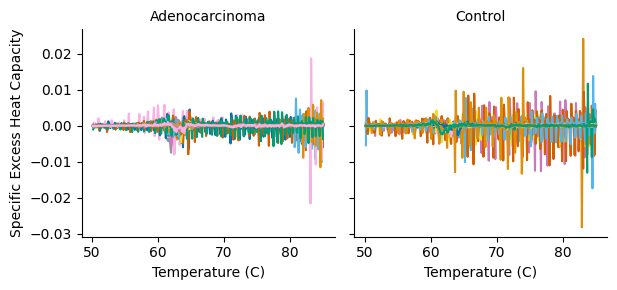

In [13]:
df_long = pd.melt(df_tree_dif2, id_vars=['sample_id', 'pub_id', 'CancerType'], var_name='temp', value_name='dsp' )
df_long['temp'] = df_long['temp'].str.replace('T', '').astype(float)


g = sns.FacetGrid(df_long, col="CancerType", col_wrap= 3, hue="sample_id", palette = 'colorblind')
g.map_dataframe(sns.lineplot, x="temp", y="dsp")
g.set_axis_labels("Temperature (C)", "Specific Excess Heat Capacity")
g.set_titles(col_template="{col_name}")

In [15]:
df_tree_dif1 = df_tree.select_dtypes(include=['number']).diff(axis = 1)
df_tree_dif2 = df_tree_dif1.diff(axis = 1)
df_tree_dif3 = df_tree_dif2.diff(axis = 1)
non_numeric_columns = df_tree.select_dtypes(exclude=['number'])
df_tree_dif3 = pd.concat( [df_tree_dif3, non_numeric_columns], axis=1)
df_tree_dif3 = df_tree_dif3.iloc[:, 3:]

#df_tree_dif3

,T50.3,T50.4,T50.5,T50.6,T50.7,T50.8,T50.9,T51,T51.1,T51.2,...,T84.4,T84.5,T84.6,T84.7,T84.8,T84.9,T85,sample_id,pub_id,CancerType
0,0.00020,0.00027,7.000000e-05,-6.700000e-04,1.800000e-04,-0.00014,4.300000e-04,-0.00026,-0.00018,0.00003,...,0.000910,1.300000e-04,-0.000271,0.000330,-0.000197,5.560000e-04,-0.000435,C67801,L14,Adenocarcinoma
1,0.00037,-0.00018,-5.700000e-04,8.600000e-04,-5.500000e-04,0.00019,-1.800000e-04,0.00034,-0.00034,0.00057,...,0.000440,1.300000e-04,0.000070,0.000090,0.000039,-1.990000e-04,0.000513,C67901,L15,Adenocarcinoma
2,0.00032,-0.00027,2.400000e-04,3.000000e-05,-2.500000e-04,0.00026,-4.700000e-04,0.00032,-0.00006,0.00075,...,-0.000177,1.710000e-04,-0.000531,0.001342,-0.000340,-5.800000e-04,0.000050,C55701,L4,Adenocarcinoma
3,0.00011,-0.00066,3.100000e-04,-1.000000e-04,-3.000000e-04,0.00071,-4.200000e-04,0.00029,0.00008,-0.00033,...,-0.001170,1.120000e-03,-0.000640,0.000440,0.000300,-7.800000e-04,0.000760,C67201,L13,Adenocarcinoma
4,-0.00051,0.00021,9.400000e-04,-3.100000e-04,-6.200000e-04,0.00055,-4.200000e-04,-0.00015,0.00051,0.00020,...,-0.000220,1.300000e-04,0.001921,-0.000161,-0.001199,2.497000e-04,-0.000176,L15701,L83,Adenocarcinoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,-0.00032,-0.00005,2.000000e-04,-1.600000e-04,8.000000e-05,0.00003,1.734723e-18,0.00002,-0.00005,0.00002,...,0.000290,-1.400000e-04,0.000170,-0.000120,0.000280,-1.750000e-04,0.000401,44,C39,Control
119,0.00009,-0.00009,-4.000000e-05,-4.000000e-05,5.000000e-05,-0.00004,5.000000e-05,-0.00005,-0.00002,0.00004,...,0.000100,-1.000000e-05,-0.000020,0.000150,-0.000111,1.600000e-05,0.000396,45,C40,Control
120,0.00003,-0.00012,-1.734723e-18,4.000000e-05,3.000000e-05,0.00005,-1.000000e-04,-0.00002,0.00001,0.00002,...,0.000190,8.673617e-19,0.000020,-0.000170,-0.000150,1.000000e-04,0.000140,46,C41,Control
121,-0.00074,0.00011,1.400000e-04,1.200000e-04,-3.000000e-05,0.00010,-1.000000e-04,0.00011,0.00006,-0.00004,...,-0.000030,-5.000000e-05,0.000130,0.000190,-0.000110,-3.000000e-05,0.000100,47,C42,Control


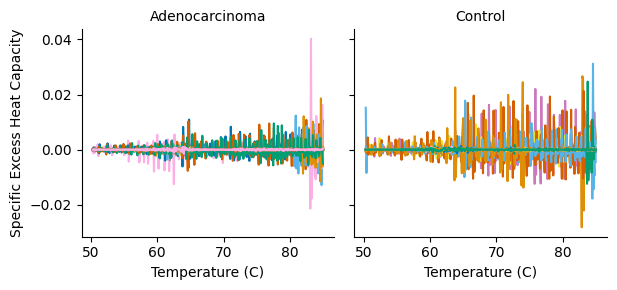

In [16]:
df_long = pd.melt(df_tree_dif3, id_vars=['sample_id', 'pub_id', 'CancerType'], var_name='temp', value_name='dsp' )
df_long['temp'] = df_long['temp'].str.replace('T', '').astype(float)


g = sns.FacetGrid(df_long, col="CancerType", col_wrap= 3, hue="sample_id", palette = 'colorblind')
g.map_dataframe(sns.lineplot, x="temp", y="dsp")
g.set_axis_labels("Temperature (C)", "Specific Excess Heat Capacity")
g.set_titles(col_template="{col_name}")